## : Preprocessing and Principal Component Analysis 

 Use the `Diabetes/train.csv` file provided. 

In [1]:
# Add any additional libraries you will use for this assignment in this block
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Your answer here.
Df = pd.read_csv('Diabetes/train.csv')

Df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,183,0,0,0,28.4,0.212,36,Yes
1,1,93,70,31,0,30.4,0.315,23,No
2,5,108,72,43,75,36.1,0.263,33,No
3,0,107,60,25,0,26.4,0.133,23,No
4,1,95,60,18,58,23.9,0.260,22,No


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

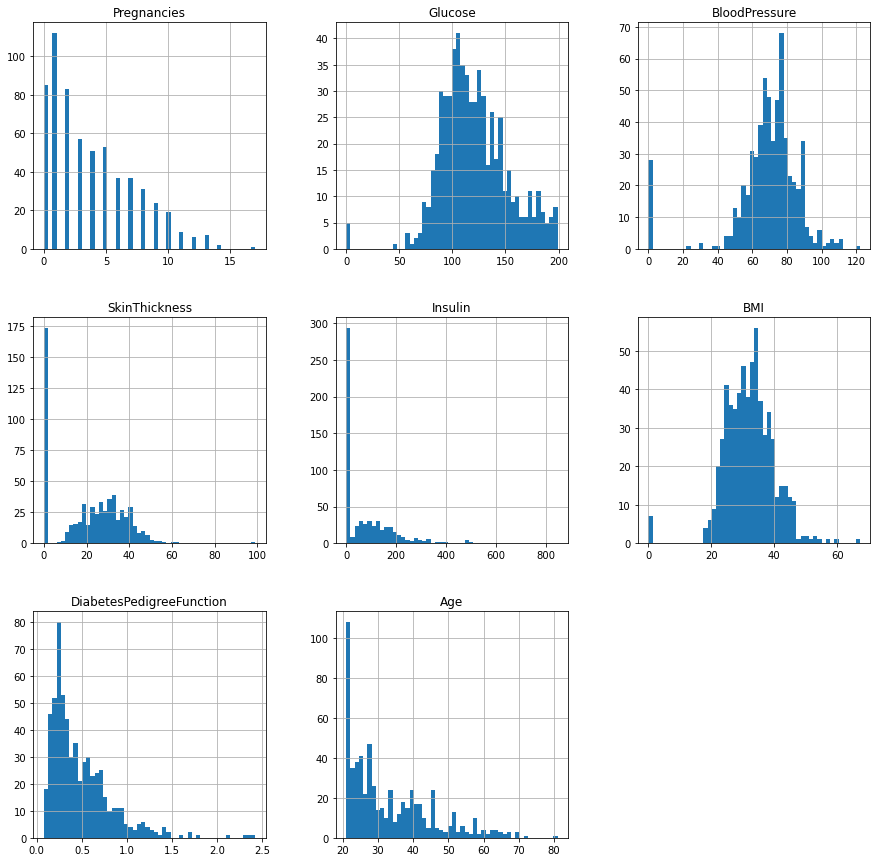

In [3]:
Df.hist(bins=50, figsize=(15, 15))


As you can see in the above histograms, there are plenty of zeros in the dataset where there should've been a non-zero value. For example, about 30 samples have zero BP! So your first step is to pre-process this data so that some of the features which should not have zero values will be replaced by non-zeros.

<div class="alert alert-block alert-danger">
<b>Question 1(a). </b> Replace the zeros (if any) in "BloodPressure", "BMI", "Glucose", "Insulin", "SkinThickness", "DiabetesPedigreeFunction","Age" columns with their corresponding median values in the dataset. You can use Pandas or sklearn's in-built tools for this step. Let's call this dataframe Df_Imputed. <b> (20) </b>
</div>

Note: We are not imputing "Pregnancies" column since a zero pregnancy count is still meaningful, unlike having a zero BMI!

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

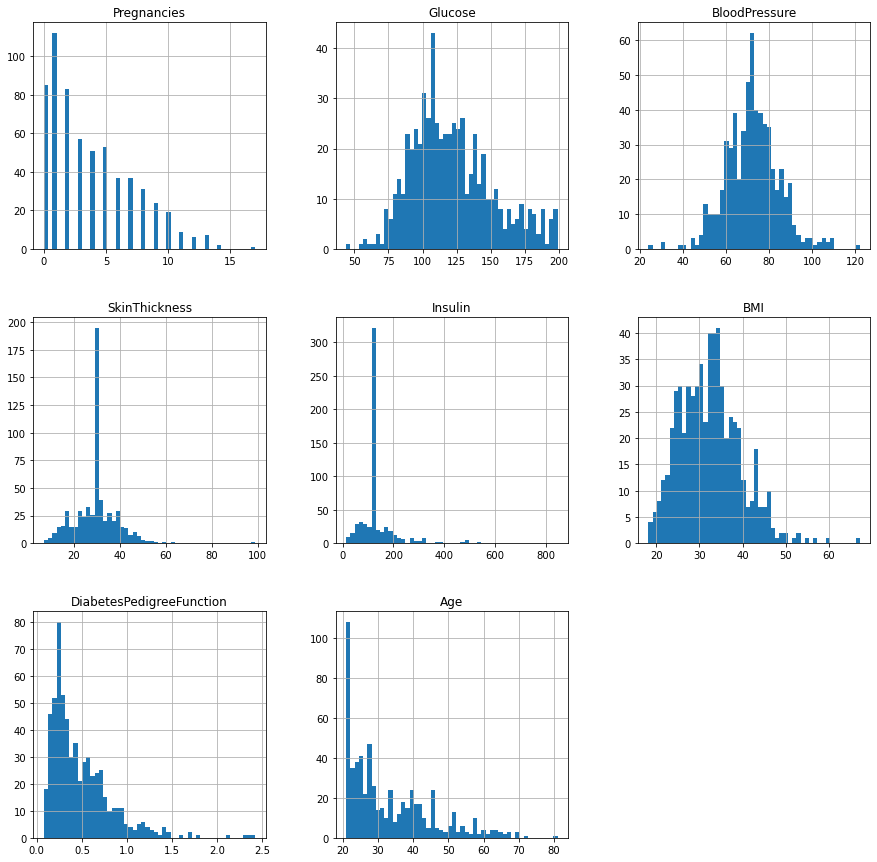

In [4]:
features_train = Df.iloc[:, 1:8]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='median')
imputer.fit(features_train)

features_train_imp = imputer.transform(features_train)
Df_Imputed = Df.copy()
Df_Imputed.iloc[:, 1:8] = features_train_imp
Df_Imputed.hist(bins=50, figsize=(15, 15))

<div class="alert alert-block alert-danger">
<b>Question 1(b). </b> Standardize the dataframe Df_Imputed in such a way that each column has a mean of 0 and standard deviation of 1. Store this in a new dataframe Df_Standard. You can use any in-built function of your choice for this step. <b> (10) </b>
</div>

Note: Do not standardize the 'Outcome' column!


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

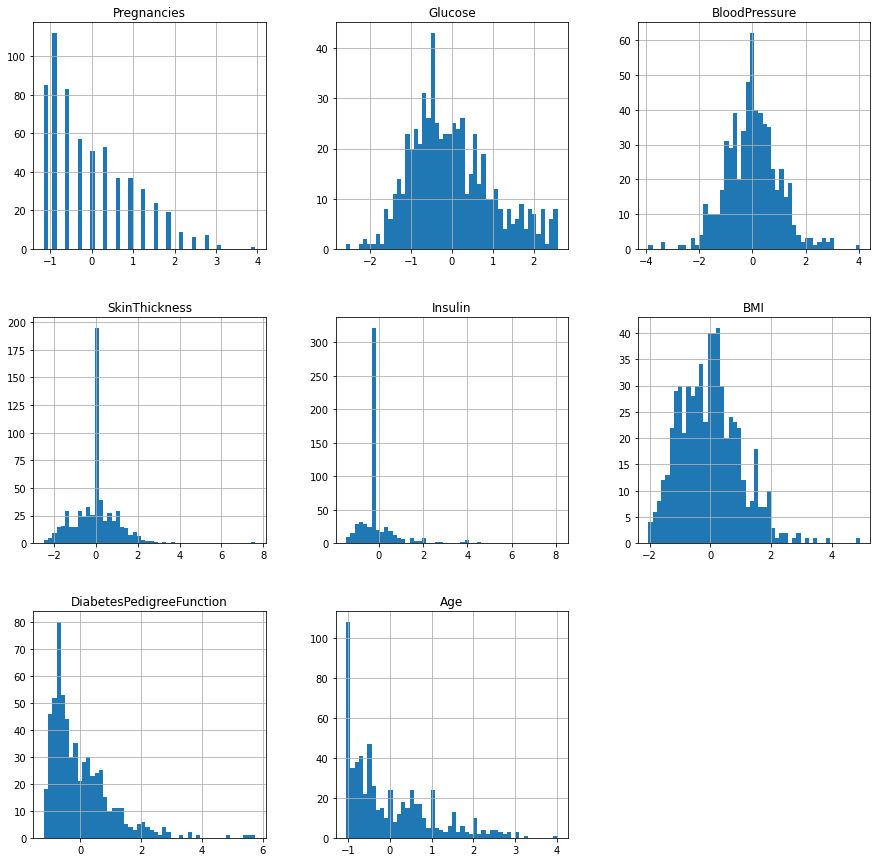

In [5]:
from sklearn import preprocessing
features_train = Df_Imputed.iloc[:, 0:8]
scaler = preprocessing.StandardScaler().fit(features_train)
features_train_scaled = scaler.transform(features_train)
#Df_Standard = features_train_scaled

Df_Standard = Df_Imputed.copy()
Df_Standard.iloc[:, 0:8] = features_train_scaled

pd.DataFrame(Df_Standard).hist(bins=50, figsize=(15, 15))

<div class="alert alert-block alert-danger">
<b>Question 1(c). </b> Compute the covariance matrix corresponding to the features in Df_Standard and store it in the variable "CovMat". Note that, if Df_Standard has 100 features, the covariance matrix should be a 100x100 matrix. This step can be performed using Numpy. <b> (5) </b>
</div>



[[ 1.00163132  0.12298357  0.21534587  0.11781743  0.05616462  0.03620213
  -0.02391509  0.53110395]
 [ 0.12298357  1.00163132  0.20687577  0.20380149  0.42256093  0.22627476
   0.16182204  0.25765623]
 [ 0.21534587  0.20687577  1.00163132  0.19587946  0.04651902  0.2973257
  -0.00804265  0.32176477]
 [ 0.11781743  0.20380149  0.19587946  1.00163132  0.13506088  0.54883403
   0.10519561  0.15182696]
 [ 0.05616462  0.42256093  0.04651902  0.13506088  1.00163132  0.14750764
   0.15278301  0.11713656]
 [ 0.03620213  0.22627476  0.2973257   0.54883403  0.14750764  1.00163132
   0.15032336  0.03838769]
 [-0.02391509  0.16182204 -0.00804265  0.10519561  0.15278301  0.15032336
   1.00163132  0.04301062]
 [ 0.53110395  0.25765623  0.32176477  0.15182696  0.11713656  0.03838769
   0.04301062  1.00163132]]


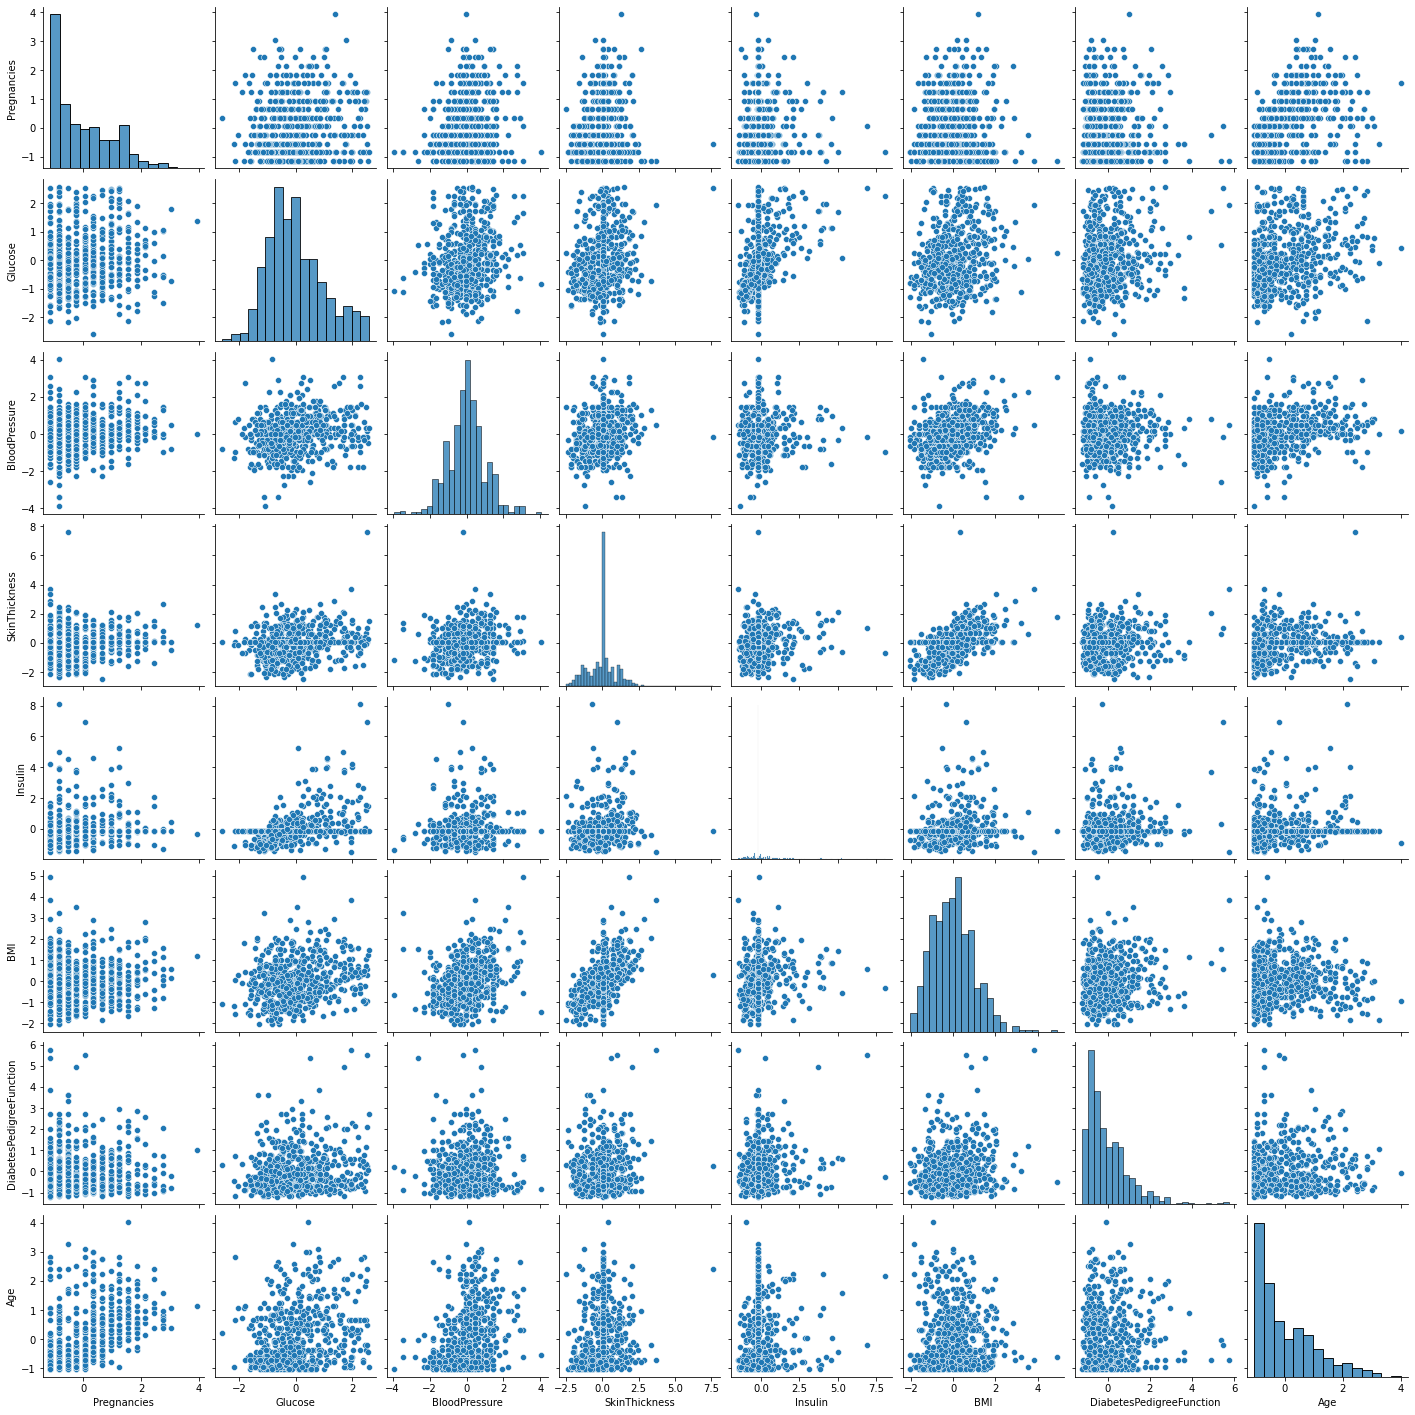

In [6]:
import seaborn as sns
sns.pairplot(Df_Standard)
CovMat = np.cov(Df_Standard.iloc[:,0:8] , rowvar=False)
print(CovMat)

<div class="alert alert-block alert-danger">
<b>Question 1(d). </b> Compute the eigenvalues and eigenvectors of the covariance matrix stored in CovMat using Numpy. Identify and explicitly report the columns (from the eigenvector matrix) you would use to obtain the first five principal components. <b> (25) </b>
</div>



In [7]:
D, V = np.linalg.eig(CovMat)

eigValIndice = np.argsort(-D)
eigVal = D[eigValIndice]
eigVect = V[:, eigValIndice]
print('The first five PC is columns: ', eigValIndice[0:5])
print('These 5 columns from the eigenvector matrix are: ', eigVect[:, 0:5])

Df_lowD = np.dot(Df_Standard.iloc[:, 0:8], eigVect)

Df_recons = np.dot(Df_lowD[:, 0:5], eigVect.T[0:5, :])

The first five PC is columns:  [0 1 7 6 5]
These 5 columns from the eigenvector matrix are:  [[-0.31460659 -0.55570013 -0.00522782 -0.19838167 -0.35570485]
 [-0.41329724  0.12317445 -0.41593749  0.28027714  0.14002082]
 [-0.37221478 -0.17943988  0.29794397  0.16306494  0.75480416]
 [-0.40359858  0.28626391  0.39195457 -0.04181473 -0.44042932]
 [-0.30028675  0.2214763  -0.56365626  0.33991709 -0.16365311]
 [-0.39739179  0.39262564  0.407406    0.00999857 -0.04959681]
 [-0.16851154  0.31090525 -0.30304367 -0.84482581  0.24093427]
 [-0.39023572 -0.51187009 -0.09511142 -0.15612985 -0.05356692]]


<div class="alert alert-block alert-danger">
<b>Question 1(e). </b> Compute the first two principal components using eigenvectors from 1(d). Make a scatter plot to display your samples and indicate the class of each sample ('Yes' or 'No') in a different color/shape. <b> (10) </b>
</div>


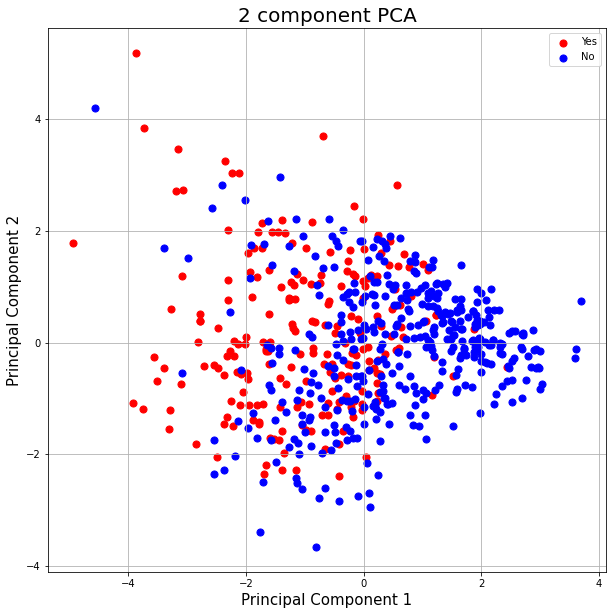

In [8]:
principalDf = pd.DataFrame(
    data=Df_lowD[:, 0:2],
    columns=['principal component 1', 'principal component 2'])
CovMat1 = np.cov(principalDf, rowvar=False)

finalDf = pd.concat([principalDf, Df['Outcome']], axis=1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['Yes', 'No']
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Outcome'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=color,
               s=50)
ax.legend(targets)
ax.grid()

<div class="alert alert-block alert-danger">
<b>Question 1(f). </b> Write your own code to compute the "explained variance" and "explained variance ratio" values for each of the principal components of Df_Standard. <b> (15+5) </b>
</div>


In [9]:
print('The explained variance (ratio) of PC1 is: ', '%.3f' % eigVal[0], '(',
      '%.4f' % (eigVal[0] / eigVal.sum()), ')')
print('The explained variance (ratio) of PC2 is: ', '%.3f' % eigVal[1], '(',
      '%.4f' % (eigVal[1] / eigVal.sum()), ')')

The explained variance (ratio) of PC1 is:  2.314 ( 0.2888 )
The explained variance (ratio) of PC2 is:  1.438 ( 0.1794 )



<div class="alert alert-block alert-danger">
<b>Question 1(g). </b> Compute the first two principal components using scikitlearn. Make a scatter plot similar to 1(e). Report the explained variance (ratios) of each principal component using the ".explained_variance_ratio_" object of sklearn's PCA output. Report your observations comparing these results to your solutions obtained in 1(e) and 1(f). <b> (10) </b>
</div>

array([0.28883146, 0.1794381 ])

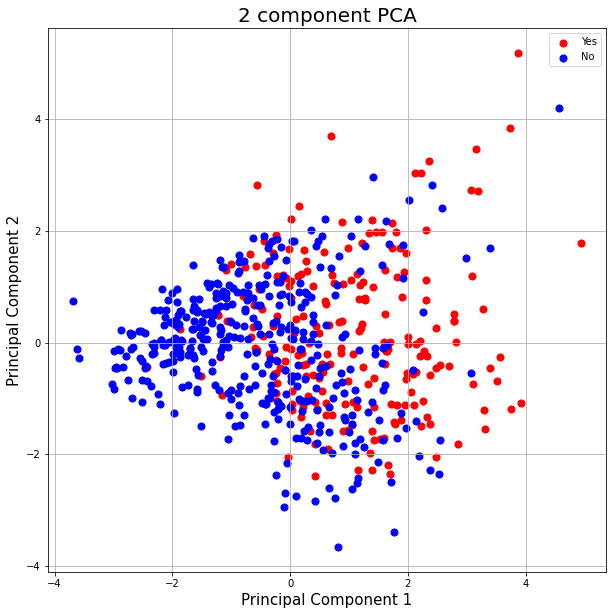

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x = Df_Standard.iloc[:, 0:8]
#principalComponents = pca.fit_transform(x)
PCA_Diab = pca.fit(x)
principalComponents = PCA_Diab.transform(x)
principalDf = pd.DataFrame(
    data=principalComponents,
    columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, Df['Outcome']], axis=1)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['Yes', 'No']
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Outcome'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=color,
               s=50)
ax.legend(targets)
ax.grid()
PCA_Diab.explained_variance_
PCA_Diab.explained_variance_ratio_

The solved principle components are the same as calculated in sklearn. However, the +/- sign is contrary for first PC in the own code and in sklearn.

## : Model Evaluation 
Use files under `Diabetes/` folder provided. 


<div class="alert alert-block alert-danger">
<b>Question 2(a).</b> Perform imputation by replacing zero values (if any) in "BloodPressure", "BMI", "Glucose", "Insulin", "DiabetesPedigreeFunction","Age"  for the test data under Diabetes/test.csv.
 <b> (5) </b>
</div>

Hint: This imputation should be done based on training data alone.

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

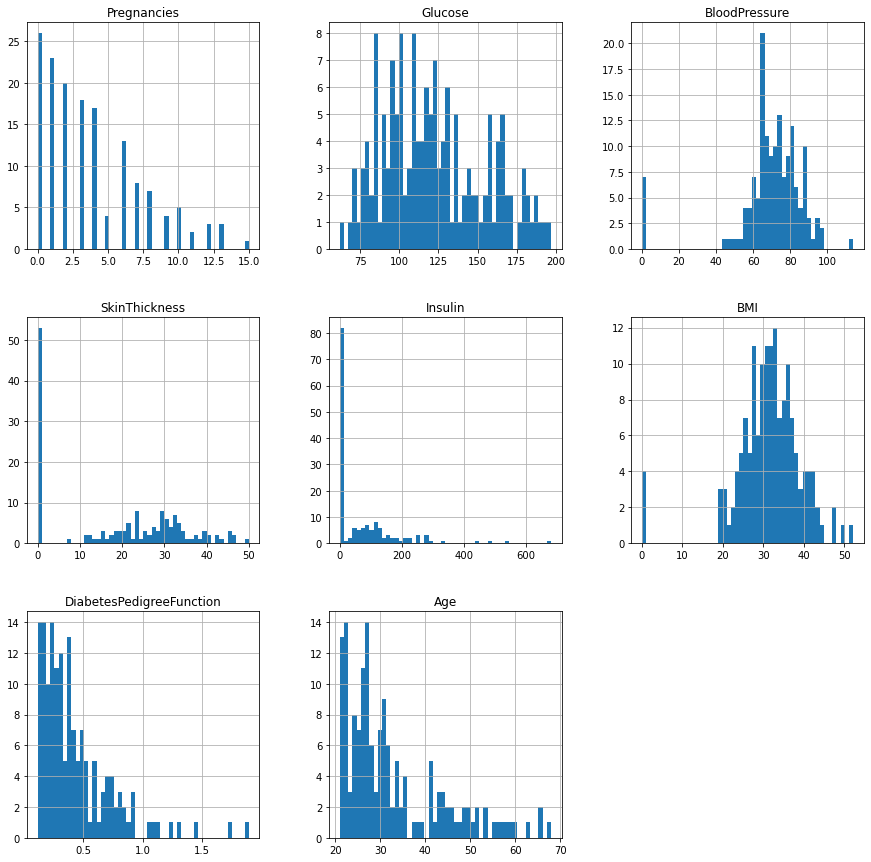

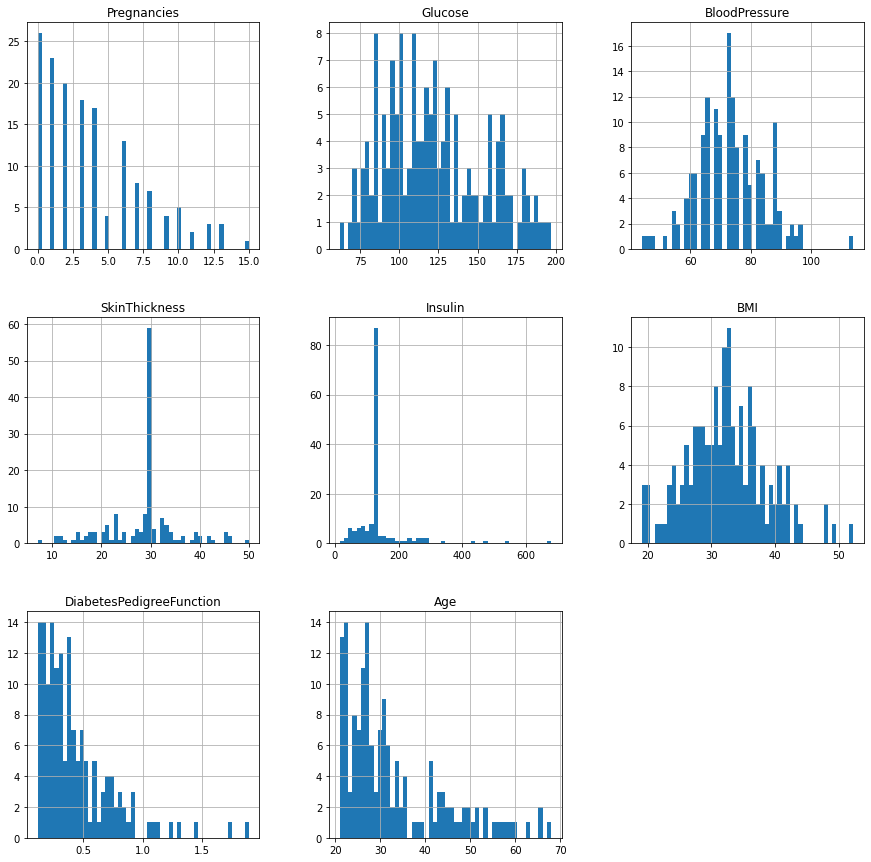

In [11]:
Df_test = pd.read_csv('Diabetes/test.csv')

Df_test.head()
Df_test.hist(bins=50, figsize=(15, 15))
features_test = Df_test.iloc[:, 1:8]
features_test_imp = imputer.transform(features_test)
Df_test_Imputed = Df_test.copy()
Df_test_Imputed.iloc[:, 1:8] = features_test_imp
Df_test_Imputed.hist(bins=50, figsize=(15, 15))

<div class="alert alert-block alert-danger">
<b>Question 2(b).</b> Perform standardization of the columns in the imputed test dataset (i.e., output from 2(a)) using the StandardScalar() built using training data (from question 1(b).  <b> (5) </b> </div>


Hint: This standardization should be done based on training data alone.


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

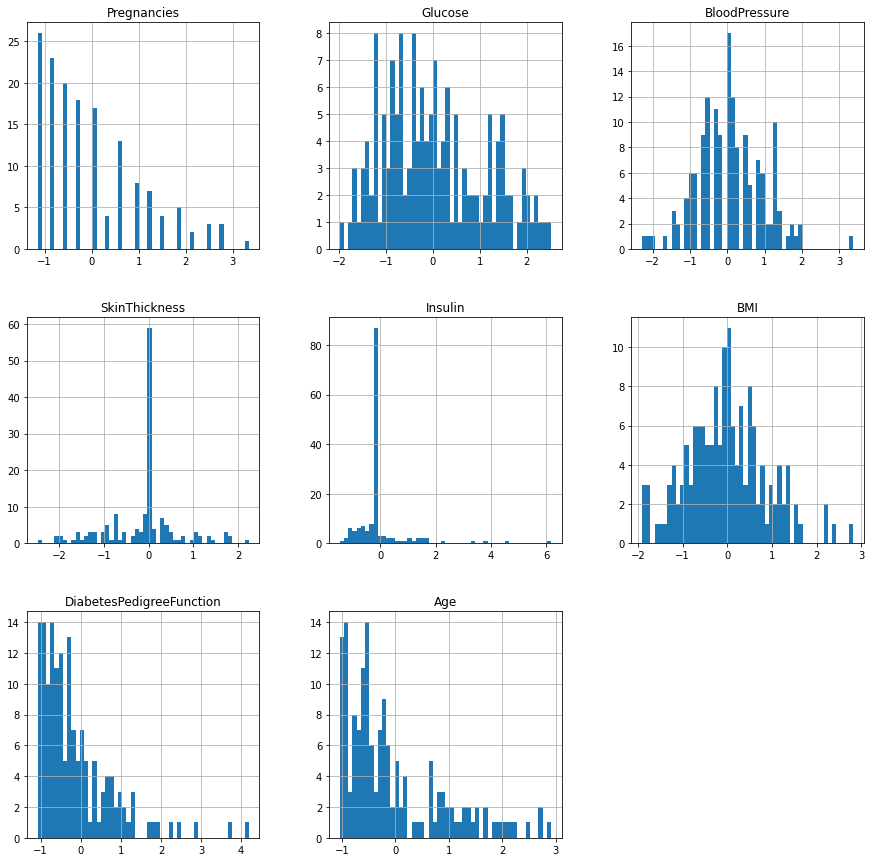

In [12]:
features_test = Df_test_Imputed.iloc[:, 0:8]
features_test_scaled = scaler.transform(features_test)

Df_test_Standard = Df_test_Imputed.copy()
Df_test_Standard.iloc[:, 0:8] = features_test_scaled

pd.DataFrame(Df_test_Standard).hist(bins=50, figsize=(15, 15))


<div class="alert alert-block alert-danger">
<b>Question 2(c). </b> Build a Logistic Regression Classifier using standardized training data and report test accuracy by making predictions on the standardized test data from question 2(b).
 <b> (5) </b>
</div>


You may choose your model parameters as you wish, or simply use defaults.

In [13]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  # Initilaize Data Encoder
le.fit(Df_Standard['Outcome'])  # Fit encoder to data

X_train = Df_Standard.iloc[:, 0:8]
y_train = le.transform(Df_Standard.iloc[:, -1])

X_test = Df_test_Standard.iloc[:, 0:8]
y_test = le.transform(Df_test_Standard.iloc[:, -1])

#

clf_lr = LogisticRegression(solver='lbfgs')
clf_lr.fit(X_train, y_train)
print(clf_lr.coef_)
print(clf_lr.intercept_)
print('Accuracy is: ', accuracy_score(y_test, clf_lr.predict(X_test)))

[[ 0.3928321   1.09843551 -0.04523861  0.05920431 -0.00833868  0.66306085
   0.25139212  0.09681274]]
[-0.83099325]
Accuracy is:  0.7792207792207793



<div class="alert alert-block alert-danger">
<b>Question 2(d). </b> Build a GaussianNB Classifier using standardized training data and report test accuracy by making predictions on the standardized test data from question 2(b).
 <b> (5) </b>
</div>



You may choose your model parameters as you wish, or simply use defaults.

In [14]:
from sklearn.naive_bayes import GaussianNB
clf_Gau = GaussianNB()
clf_Gau.fit(X_train,y_train)
print('Accuracy is: ', accuracy_score(y_test,clf_Gau.predict(X_test)))


Accuracy is:  0.7467532467532467



<div class="alert alert-block alert-danger">
<b>Question 2(e). </b> Build an SVM classifier with Linear kernel using standardized training data and report test accuracy by making predictions on the standardized test data from question 2(b).
 <b> (5) </b>
</div>


You may choose your model parameters as you wish, or simply use defaults.

In [15]:
from sklearn import svm
clf_svmli = svm.SVC(kernel='linear', probability=True)
clf_svmli.fit(X_train,y_train)
print('Accuracy is: ', accuracy_score(y_test,clf_svmli.predict(X_test)))


Accuracy is:  0.7597402597402597


<div class="alert alert-block alert-danger">
<b>Question 2(f). </b> Build an SVM classifier with RBF kernel using standardized training data and report test accuracy by making predictions on the standardized test data from question 2(b).
 <b> (5) </b>
</div>

You may choose your model parameters as you wish, or simply use defaults.

In [16]:
from sklearn import svm
clf_svmrbf = svm.SVC(kernel='rbf', probability=True)
clf_svmrbf.fit(X_train,y_train)
print('Accuracy is: ', accuracy_score(y_test,clf_svmrbf.predict(X_test)))

Accuracy is:  0.7597402597402597



<div class="alert alert-block alert-danger">
<b>Question 2(g). </b> Since your model is supposed to be crucial indicator of onset of diabetes, it is important that you don't misdiagnose people who will actually end up with diabetes (i.e., condition positive samples). In other words, your model should minimize the number of ___. Is it a) True Positives, b) False Positives, c) True Negatives, d) False Negatives?
 <b> (5) </b>
</div>


(d) False Negatives


<div class="alert alert-block alert-danger">
<b>Question 2(h). </b> Write your own functions to compute (a) Confusion Matrix, (b) Accuracy, (c) Recall/Sensitivity/True Positive Rate, (d) Precision, (e) False positive rate. Your functions should take two lists as input, namely, "y_true" , and "y_predicted". You may use your own confusion matrix that you built in part (a) for subsequent computations.
 <b> (25) </b>
</div>

You can read more about them at https://en.wikipedia.org/wiki/Sensitivity_and_specificity. Note that in this example, a condition positive corresponds to an 'Outcome' of 'Yes' and condition negative here corresponds to an 'Outcome' of 'No' in Diabetes/test.csv. 

In [17]:
def confMat(y_true, y_predicted):
    #Your code here
    K = len(np.unique(y_true))  # Number of classes
    result = np.zeros((K, K))

    for i in range(len(y_true)):
        result[y_true[i]][y_predicted[i]] += 1
    return result  #return the confusion matrix


def accuracyValue(y_true, y_predicted):
    #Your code here
    TN, FP, FN, TP = confMat(y_true, y_predicted).ravel()
    acc = (TP + TN) / (TN + FP + FN + TP)
    return acc  #return the accuracy value


def recallValue(y_true, y_predicted):
    #Your code here
    TN, FP, FN, TP = confMat(y_true, y_predicted).ravel()
    TPR = TP / (TP + FN)
    return TPR  #return the recall value


def precisionValue(y_true, y_predicted):
    #Your code here
    TN, FP, FN, TP = confMat(y_true, y_predicted).ravel()
    PPV = TP / (TP + FP)
    return PPV  #return the precision value


def fprValue(y_true, y_predicted):
    #Your code here
    TN, FP, FN, TP = confMat(y_true, y_predicted).ravel()
    FPR = FP / (FP + TN)
    return FPR  #return the fpr value



For the next two questions reuse your own code from 2(h) to obtain PR and ROC curves. As mentioned earlier, condition positive here corresponds to an 'Outcome' of 'Yes' and condition negative here corresponds to an 'Outcome' of 'No' in Diabetes/test.csv. 


<div class="alert alert-block alert-danger">
<b>Question 2(i). </b> Accuracy is not the ideal performance metric for the classification problem under consideration. Therefore, we will use Precision-Recall curves based on model predictions using **standardized test data** (precision on y-axis and recall on x-axis) to evaluate our models. 
    
The goal is to pick the best performing model from the four models in 2(c)-2(f). Use model.predict_proba() function to obtain class specific probabilites. Note that you may assume "Outcome = Yes" in Diabetes/test.csv as condition positive and "Outcome = No" as condition negative. 


In order to obtain a curve, you can use probability thresholds of [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]. You need to evaluate each one of the four models' precision and recall at each threshold to obtain the PR curve. 


Once you obtain PR cuves for each of the four models, explain which model you will pick based on your understanding of PR curves.
 <b> (20) </b>
</div>


Note that if predicted positive class probability was 0.4, and threshold was 0.5, then your prediction would be "Outcome = No". Similarly, if predicted positive class probability was 0.8, and threshold was 0.5, then your prediction would be "Outcome = Yes". 


Extra Credit: Plot the PR curve obained using sklearn and compare your results. (3)

<ipython-input-17-2ddf8ccb3679>:27: RuntimeWarning: invalid value encountered in double_scalars
  PPV = TP/(TP+FP)
<ipython-input-17-2ddf8ccb3679>:27: RuntimeWarning: invalid value encountered in double_scalars
  PPV = TP/(TP+FP)
<ipython-input-17-2ddf8ccb3679>:27: RuntimeWarning: invalid value encountered in double_scalars
  PPV = TP/(TP+FP)
<ipython-input-17-2ddf8ccb3679>:27: RuntimeWarning: invalid value encountered in double_scalars
  PPV = TP/(TP+FP)


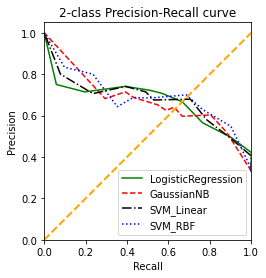

In [18]:
precision_total = []
recall_total = []
fpr_total = []
#
y_true = y_test
classifi = [clf_lr, clf_Gau, clf_svmli, clf_svmrbf]
for ccc in classifi:
    C1Probs = ccc.predict_proba(X_test)[:, 1]
    precision = []
    recall = []
    fpr = []
    thresh = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    for random_cutoff in thresh:
        predClass = []
        for pred in C1Probs:
            if pred >= random_cutoff:
                predClass.append(1)
            else:
                predClass.append(0)
        precision.append(precisionValue(y_true, predClass))
        precision = [1 if np.isnan(i) else i for i in precision]
        #TN, FP, FN, TP = confMat(y_true, predClass).ravel()
        recall.append(recallValue(y_true, predClass))
        fpr.append(fprValue(y_true, predClass))

    precision_total.append(precision)
    recall_total.append(recall)
    fpr_total.append(fpr)

plt.plot(recall_total[0], precision_total[0], color='green')
plt.plot(recall_total[1], precision_total[1], linestyle='--', color='red')
plt.plot(recall_total[2], precision_total[2], linestyle='-.', color='black')
plt.plot(recall_total[3], precision_total[3], linestyle=':', color='blue')
plt.legend(
    labels=['LogisticRegression', 'GaussianNB', 'SVM_Linear', 'SVM_RBF'])
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')

plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.axis('equal')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
ax = plt.gca()
ax.set_aspect(1)

The SVM with RBF kernel is prefered, since the SVM with RBF kernel is most outliner based on the Equal error rate (EER) point: the point where precision equals recall. 

<div class="alert alert-block alert-danger">
<b>Question 2(j). </b> Obtain ROC curves (false positive rate (FPR) on x-axis and true positive rate (TPR) on y-axis) for the standardized test data for the four models under evaluation. You may use the same steps as in 2(i) but compute FPR instead of precision (Note: TPR is same as Recall). 
    
    
Once you obtain ROC cuves for each of the four models, explain which model you will pick based on your understanding of ROC curves.
 <b> (20) </b>
</div>


Extra Credit: Plot the ROC curve obained using sklearn and compare your results. (2)

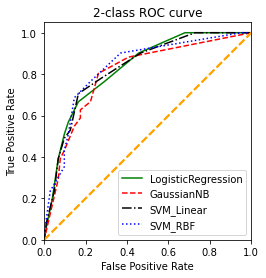

In [22]:
plt.plot(fpr_total[0],recall_total[0], color='green')
plt.plot(fpr_total[1],recall_total[1], linestyle='--', color='red')
plt.plot(fpr_total[2],recall_total[2], linestyle='-.', color='black')
plt.plot(fpr_total[3],recall_total[3], linestyle=':', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class ROC curve')
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.legend(labels=['LogisticRegression','GaussianNB','SVM_Linear','SVM_RBF'])

ax = plt.gca()
ax.set_aspect(1)

The SVM with RBF kernel is superior because its curve is closest to the upper left corner, which means at most cut-offs the true positive rate is higher and the false positive rate is lower. The area under the ROC curve (AUROC) is larger than others.

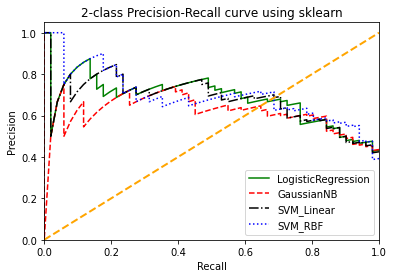

In [30]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

C1Probs = clf_lr.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, C1Probs)
plt.plot(recall, precision, color='green')

C1Probs = clf_Gau.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, C1Probs)
plt.plot(recall, precision, linestyle='--', color='red')

C1Probs = clf_svmli.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, C1Probs)
plt.plot(recall, precision, linestyle='-.', color='black')

C1Probs = clf_svmrbf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, C1Probs)
plt.plot(recall, precision, linestyle=':', color='blue')

plt.legend(
    labels=['LogisticRegression', 'GaussianNB', 'SVM_Linear', 'SVM_RBF'])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve using sklearn')
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
#ax = plt.gca()
# ax.set_aspect(1)

AUC of lr is: 0.8406624785836665
AUC of GauNB is: 0.8189605939463165
AUC of svm_linear is: 0.836093660765277
AUC of svm_rbf is: 0.8442794593565581


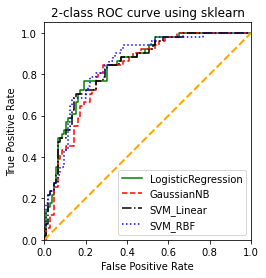

In [37]:
##
C1Probs = clf_lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, C1Probs, pos_label=1)
print('AUC of lr is:', roc_auc_score(y_test, C1Probs))
plt.plot(fpr, tpr, color='green')

C1Probs = clf_Gau.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, C1Probs, pos_label=1)
print('AUC of GauNB is:', roc_auc_score(y_test, C1Probs))
plt.plot(fpr, tpr, linestyle='--', color='red')

C1Probs = clf_svmli.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, C1Probs, pos_label=1)
print('AUC of svm_linear is:', roc_auc_score(y_test, C1Probs))
plt.plot(fpr, tpr, linestyle='-.', color='black')

C1Probs = clf_svmrbf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, C1Probs, pos_label=1)
print('AUC of svm_rbf is:', roc_auc_score(y_test, C1Probs))
plt.plot(fpr, tpr, linestyle=':', color='blue')

plt.legend(
    labels=['LogisticRegression', 'GaussianNB', 'SVM_Linear', 'SVM_RBF'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class ROC curve using sklearn')
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
ax = plt.gca()
ax.set_aspect(1)